In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import numpy as np,pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

In [ ]:
data_table=pd.read_csv("/content/drive/MyDrive/Datasets/Classification_train.csv")

In [ ]:
data=data_table.to_numpy()
m, n = data.shape
data_train = data[:25000,:].T
y_raw=data_train[0]
y = one_hot(y_raw)
x=data_train[1:n]
x=x/255
data_cv=data[25000:,:].T
y_cv=data_cv[0]
y_cv=one_hot(y_cv)
x_cv=data_cv[1:n]
x_cv=x_cv/255

In [ ]:
def ReLU(z):
  return np.maximum(z, 0)
def softmax(z):
  A = np.exp(z)/sum(np.exp(z))
  return A
def ReLU_deriv(Z):
  return Z > 0

In [ ]:
def initialise_parameters(layer_dims):
  parameters = {}
  L = len(layer_dims)
  for l in range(1, L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
  return parameters

In [ ]:
def forward_prop(X, parameters):
  w_a_values = {}    #contains w and a
  L = len(parameters) // 2
  w_a_values['A0'] = X
  for l in range(1, L):
    w_a_values['Z' + str(l)] = parameters['W' + str(l)].dot(w_a_values['A' + str(l-1)]) + parameters['b' + str(l)]
    w_a_values['A' + str(l)] = ReLU(w_a_values['Z' + str(l)])
  w_a_values['Z' + str(L)] = parameters['W' + str(L)].dot(w_a_values['A' + str(L-1)]) + parameters['b' + str(L)]
  w_a_values['A' + str(L)] = softmax(w_a_values['Z' + str(L)])
  return w_a_values['A' + str(L)], w_a_values

In [ ]:
def compute_cost(AL, Y):
  m = Y.shape[1]
  cost = -(1./m) * np.sum(Y * np.log(AL))
  cost = np.squeeze(cost)      # To make sure the cost's shape is what we expect
  return cost

In [ ]:
def backward_prop(AL, Y, parameters, w_a_values):
  grads = {}
  L = len(parameters)//2
  m = AL.shape[1]
  grads["dZ" + str(L)] = AL - Y
  grads["dW" + str(L)] = 1./m * np.dot(grads["dZ" + str(L)],w_a_values['A' + str(L-1)].T)
  grads["db" + str(L)] = 1./m * np.sum(grads["dZ" + str(L)], axis = 1, keepdims = True)
  for l in reversed(range(1, L)):
    grads["dZ" + str(l)] = np.dot(parameters['W' + str(l+1)].T,grads["dZ" + str(l+1)])*ReLU_deriv(w_a_values['A' + str(l)])
    grads["dW" + str(l)] = 1./m * np.dot(grads["dZ" + str(l)],w_a_values['A' + str(l-1)].T)
    grads["db" + str(l)] = 1./m * np.sum(grads["dZ" + str(l)], axis = 1, keepdims = True)
  return grads

In [ ]:
def update_parameters(parameters,grads,alpha):
  L = len(parameters) // 2
  for l in range(L):
    parameters["W" + str(l+1)] = parameters["W" + str(l+1)] -alpha * grads["dW" + str(l+1)]
    parameters["b" + str(l+1)] = parameters["b" + str(l+1)] -alpha * grads["db" + str(l+1)]
  return parameters

In [ ]:
def get_accuracy(X,y,parameters):
  m = X.shape[1]
  y_pred,_ = forward_prop(X, parameters)
  y = np.argmax(y, 0)
  y_pred = np.argmax(y_pred, axis=0)
  a=np.round(np.sum((y_pred == y)/m), 3)
  return a

In [ ]:
def predict(X,parameters):
  m = X.shape[1]
  y_pred,_ = forward_prop(X, parameters)
  y_pred = np.argmax(y_pred, axis=0)
  return(y_pred)

In [ ]:
def gradient_descent(X,Y,layers_dims,alpha,iterations):
  cost=[]
  itera=[]
  accu=[]
  parameters = initialise_parameters(layers_dims)
  for i in range(1,iterations+1):
    AL, w_a_values = forward_prop(X, parameters)
    grads = backward_prop(AL, Y, parameters, w_a_values)
    parameters = update_parameters(parameters, grads, alpha)
    if (i%50==0):
      acc=get_accuracy(X, Y, parameters)
      acc=acc*100
      c=compute_cost(AL, Y)
      itera.append(i)
      cost.append(c)
      print("Iteration: ", i,"    Cost: ",np.round(c,4),"    Accuracy: ",acc,"%")
      accu.append(acc)
  return parameters,itera,accu,cost

In [ ]:
layers_dims = [x.shape[0],256,128,64,y.shape[0]]
parameters,itera,accu,cost = gradient_descent(x,y,layers_dims,1,500)

Iteration:  50     Cost:  0.3234     Accuracy:  90.2 %
Iteration:  100     Cost:  0.1064     Accuracy:  97.1 %
Iteration:  150     Cost:  0.0678     Accuracy:  98.0 %
Iteration:  200     Cost:  0.0572     Accuracy:  98.5 %
Iteration:  250     Cost:  0.0387     Accuracy:  99.1 %
Iteration:  300     Cost:  0.0281     Accuracy:  99.3 %
Iteration:  350     Cost:  0.0206     Accuracy:  99.5 %
Iteration:  400     Cost:  0.0151     Accuracy:  99.7 %
Iteration:  450     Cost:  0.0112     Accuracy:  99.8 %
Iteration:  500     Cost:  0.0086     Accuracy:  99.9 %


In [ ]:
print("As we can see that our model is giving pretty good accuracy we can now check for the cross validation data.")

As we can see that our model is giving pretty good accuracy we can now check for the cross validation data.


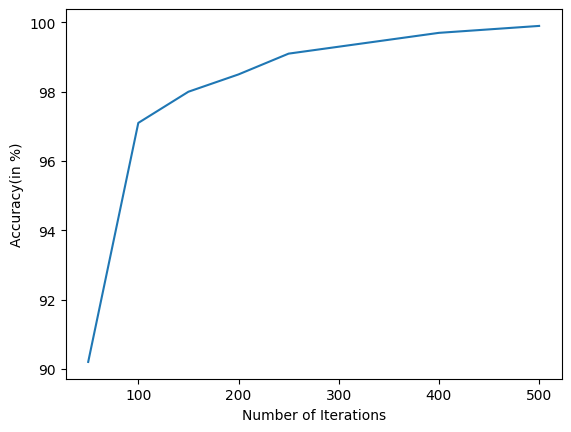

In [ ]:
plt.plot(itera,accu)
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy(in %)")
plt.show()

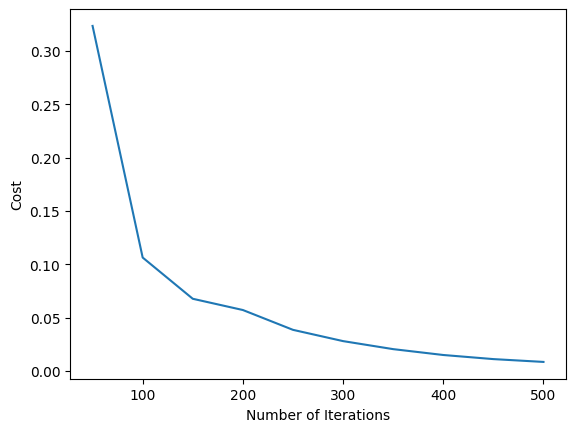

In [ ]:
plt.plot(itera,cost)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
y_predict_cv=predict(x_cv,parameters)

In [ ]:
acc=get_accuracy(x_cv,y_cv,parameters)
print(acc*100,"%")
print("As the accuracy in cross validation set is also pretty good we can finalise our code.")

98.5 %
As the accuracy in cross validation set is also pretty good we can finalise our code.


In [ ]:
data_table_test=pd.read_csv("/content/drive/MyDrive/Datasets/Classification_test.csv")
data_test=data_table_test.to_numpy()
x_test=data_test[:,1:]
x_test=x_test/255
x_test=x_test.T

In [ ]:
y_test=predict(x_test,parameters)

In [ ]:
y_test_pd=pd.DataFrame(y_test)

In [ ]:
y_test_pd.to_csv("Result_Neural_Network.csv")
from google.colab import files
files.download('Result_Neural_Network.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>